# Beer data-set for Data Science case-study
## Problem Statment
This data set is a Beer data-set for your Data Science case-study round. You are expected to
build a Machine Learning model which predicts the overall rating of the beer. (“review/overall”
column in “train.csv” is your dependent variable.)
You are free to formulate this prediction problem either as a classification problem or regression
problem.


* [Data cleaning and Data preprocessing](#0)

* [Remove Outliers](#1)

* [Feature Engineering](#2)
  * [Transforming "beer/style"](#2.1)
  * [Transforming "review/text"](#2.1)

* [Feature scaling](#3)

* [Model Training and Evaluation](#4)

<a name="0"></a>
## Data cleaning and Data preprocessing


In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [183]:
data = pd.read_csv("train.csv")

In [184]:
data.head(3)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [186]:
data.isnull().sum()

,0
index,0
beer/ABV,0
beer/beerId,0
beer/brewerId,0
beer/name,0
beer/style,0
review/appearance,0
review/aroma,0
review/overall,0
review/palate,0


In [187]:
df1 = data.drop(['index', 'review/timeStruct','review/timeUnix', 'user/ageInSeconds','user/birthdayRaw','user/birthdayUnix','user/gender','user/profileName'],axis=1)
df1.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text
0,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...
1,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...
2,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...
3,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...
4,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...


In [188]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beer/ABV           37500 non-null  float64
 1   beer/beerId        37500 non-null  int64  
 2   beer/brewerId      37500 non-null  int64  
 3   beer/name          37500 non-null  object 
 4   beer/style         37500 non-null  object 
 5   review/appearance  37500 non-null  float64
 6   review/aroma       37500 non-null  float64
 7   review/overall     37500 non-null  float64
 8   review/palate      37500 non-null  float64
 9   review/taste       37500 non-null  float64
 10  review/text        37490 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 3.1+ MB


In [189]:
df1.describe()

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000
mean,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440
std,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504
min,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000
25%,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000
50%,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000
75%,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000
max,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000


In [190]:
for col in df1.columns:
  print(col, df1[col].nunique())

beer/ABV 126
beer/beerId 1731
beer/brewerId 212
beer/name 1688
beer/style 95
review/appearance 10
review/aroma 9
review/overall 10
review/palate 9
review/taste 9
review/text 37482


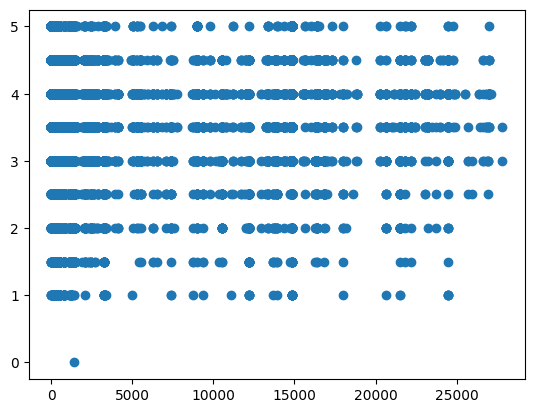

In [191]:
plt.scatter(df1["beer/brewerId"], df1["review/overall"])

In [192]:
df2 = df1.drop(["beer/beerId" ,"beer/brewerId" ,"beer/name"],axis=1)
df2.head(3)

,beer/ABV,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text
0,5.0,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...
1,11.0,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...
2,4.7,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...


In [193]:
beer_style_count = df2['beer/style'].value_counts()
beer_style_count

,count
beer/style,
American Double / Imperial Stout,4495
American IPA,3050
American Double / Imperial IPA,2872
Scotch Ale / Wee Heavy,2133
Russian Imperial Stout,2032
...,...
Kristalweizen,6
Berliner Weissbier,6
Eisbock,5


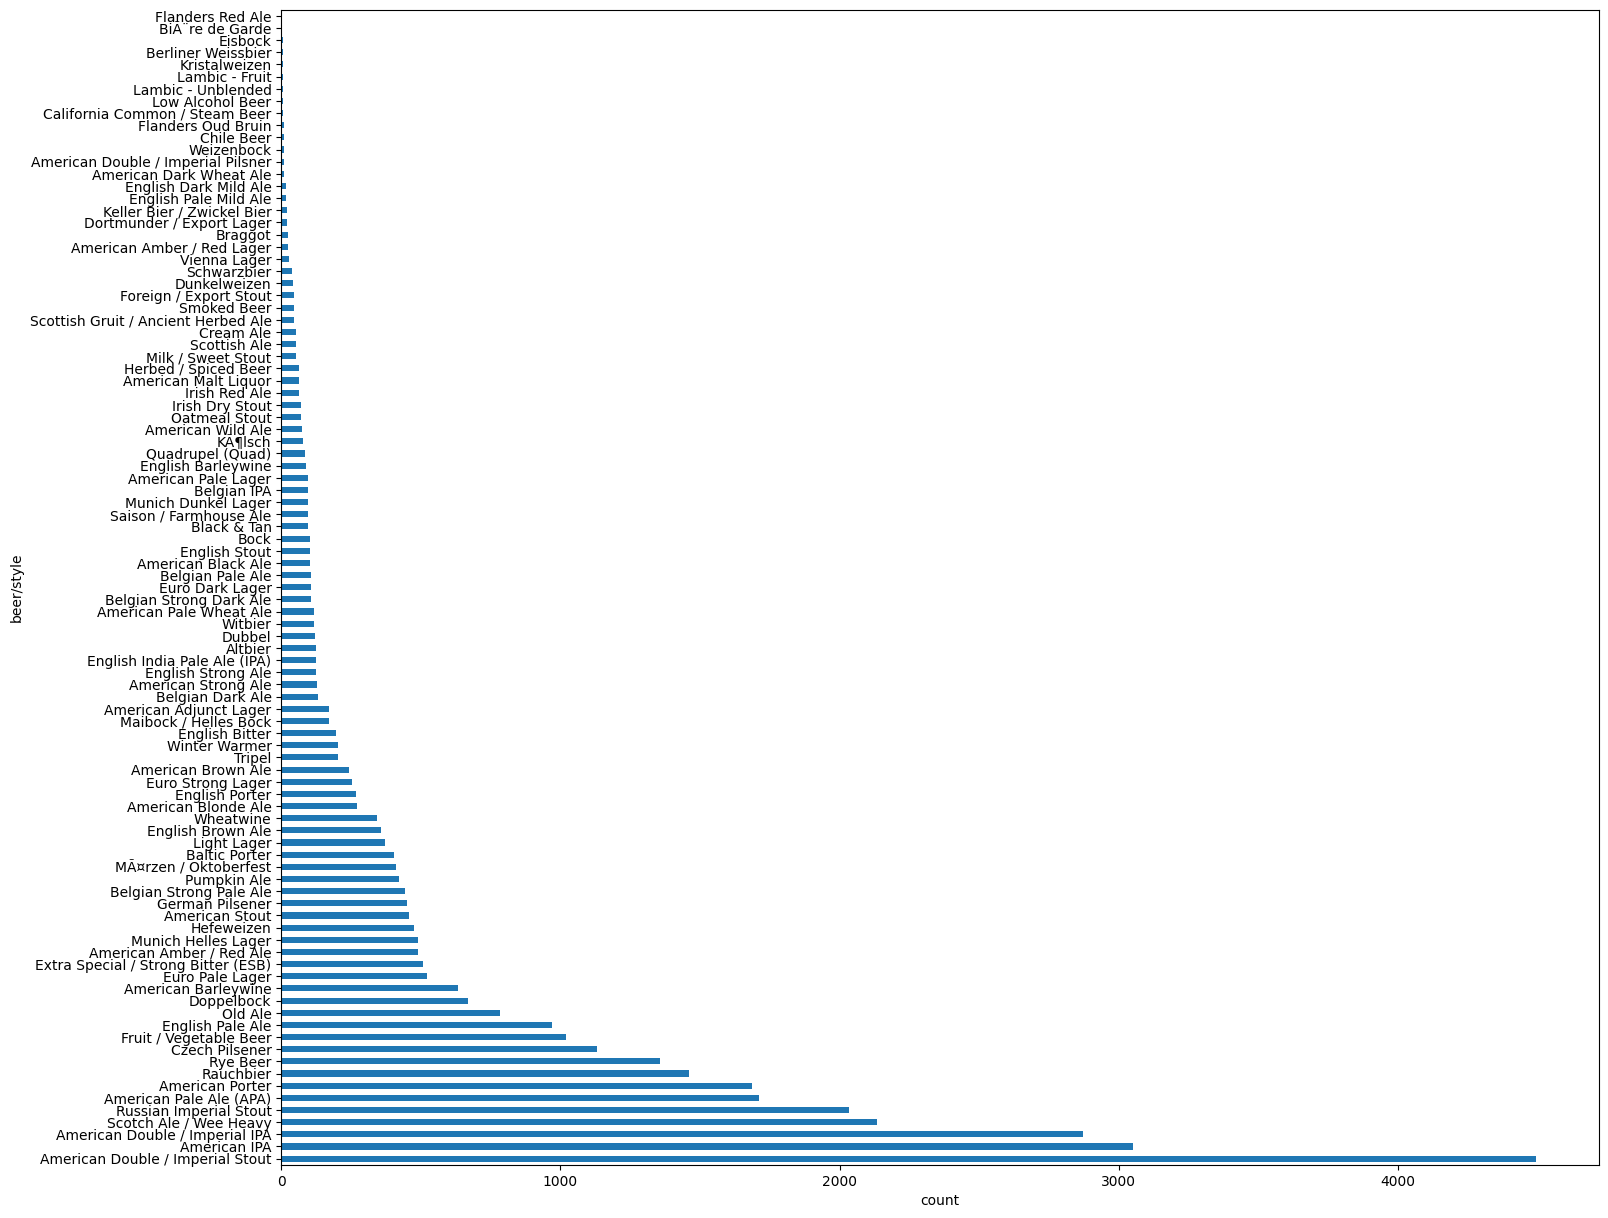

In [194]:
plt.figure(figsize=(17, 15))
beer_style_count.plot(kind='barh')
plt.xlabel('count')
plt.ylabel('beer/style')
max_count = df2["beer/style"].value_counts().max()
plt.show()

In [195]:
len(beer_style_count[beer_style_count > 1000])

11

In [196]:
beer_style_less_than1000 = beer_style_count[beer_style_count < 1000]

In [197]:
df3 = df2.copy()

In [198]:
df3["beer/style"] = df2["beer/style"].apply(lambda x: "other" if x in beer_style_less_than1000 else x)

In [199]:
print(f"before nuique: {df2['beer/style'].nunique()}\n after nuique: {df3['beer/style'].nunique()}")

before nuique: 95
 after nuique: 12


<a name="1"></a>
## 1-Removing Outliers

In [200]:
df3.head(1)

,beer/ABV,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text
0,5.0,other,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...


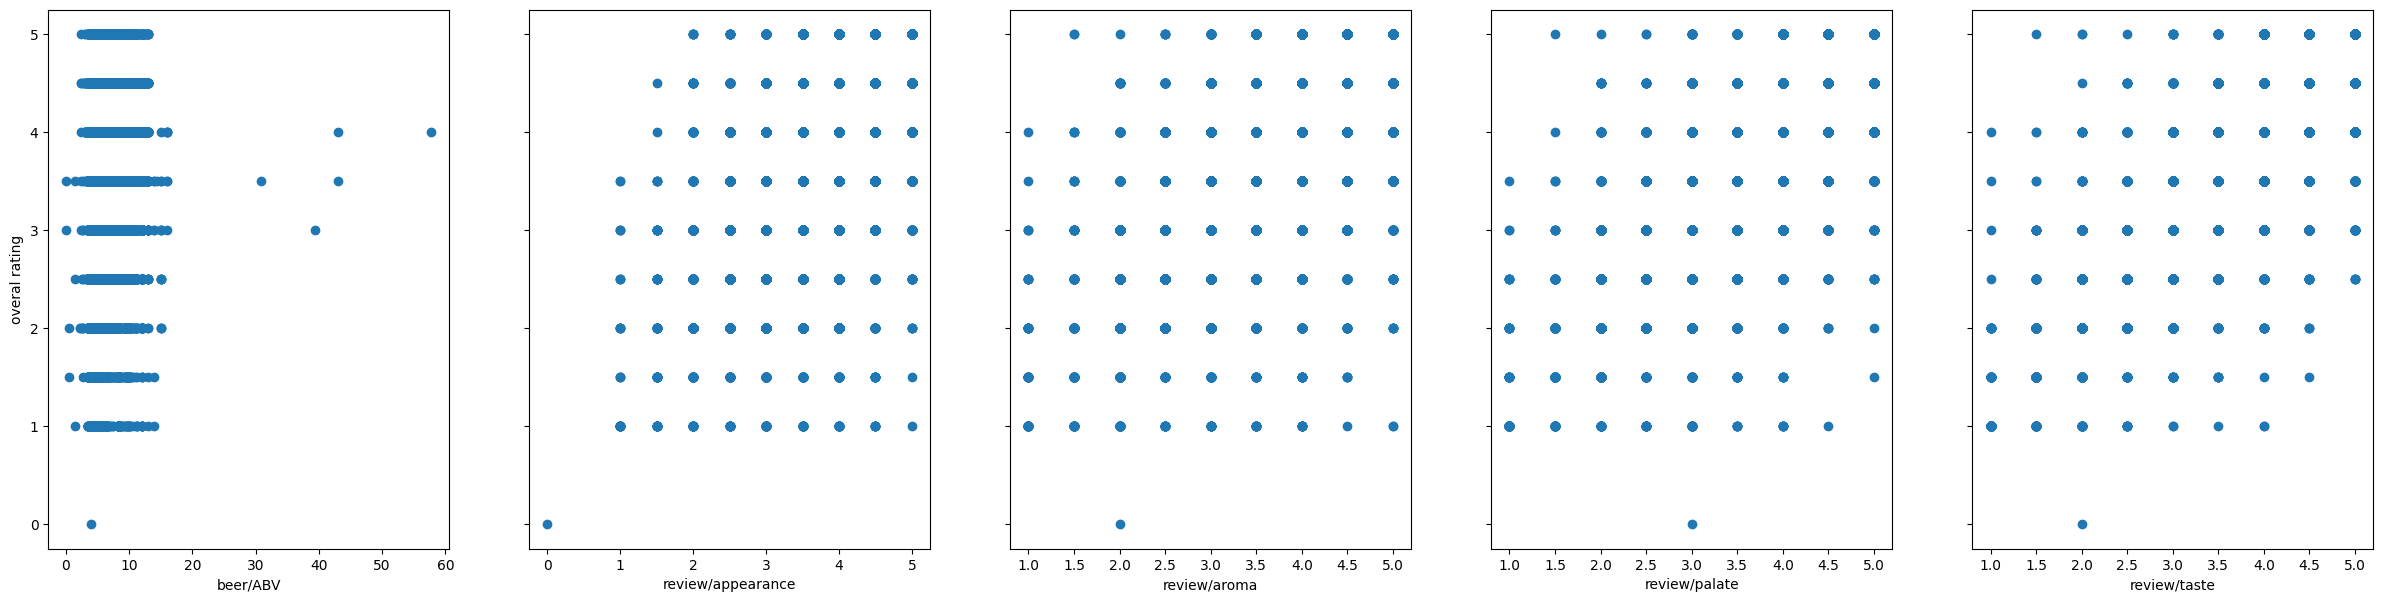

In [201]:
x_features = ["beer/ABV", "review/appearance", "review/aroma", "review/palate","review/taste"]
fig,ax=plt.subplots(1, 5, figsize=(30, 7), sharey=True)
X = df3.drop(["beer/style" ,"review/overall","review/text"],axis=1)
y = df3["review/overall"]
for i in range(len(ax)):
  ax[i].scatter(X[x_features[i]],y)
  ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("overal rating")
plt.show()

In [202]:
df3.groupby('review/taste')['review/overall'].describe()

,count,mean,std,min,25%,50%,75%,max
review/taste,,,,,,,,
1.0,151.0,1.321192,0.491068,1.0,1.0,1.0,1.5,4.0
1.5,258.0,1.771318,0.583521,1.0,1.5,1.5,2.0,5.0
2.0,817.0,2.242962,0.595656,0.0,2.0,2.0,2.5,5.0
2.5,1232.0,2.697240,0.548664,1.0,2.5,2.5,3.0,5.0
3.0,3141.0,3.196593,0.504866,1.0,3.0,3.0,3.5,5.0
3.5,6577.0,3.620040,0.433185,1.0,3.5,3.5,4.0,5.0
4.0,12381.0,4.007431,0.398129,1.0,4.0,4.0,4.0,5.0
4.5,9684.0,4.290737,0.396356,1.5,4.0,4.5,4.5,5.0
5.0,3259.0,4.610310,0.417023,2.5,4.5,4.5,5.0,5.0


In [203]:
df3[df3["beer/ABV"] > 30].count()

,0
beer/ABV,5
beer/style,5
review/appearance,5
review/aroma,5
review/overall,5
review/palate,5
review/taste,5
review/text,5


In [204]:
df3[df3["review/appearance"] < 1].count()

,0
beer/ABV,1
beer/style,1
review/appearance,1
review/aroma,1
review/overall,1
review/palate,1
review/taste,1
review/text,1


In [205]:
drop_outliers = df3[(df3["beer/ABV"] > 30) |
                     (df3["review/appearance"] < 1)].index

df4 = df3.drop(drop_outliers)
print(f"df3 rows: {df3.shape[0]}")
print(f"df4 rows: {df4.shape[0]}")

df3 rows: 37500
df4 rows: 37494


<a name="2"></a>
# 2 - Feature Engineering
*   [Transforming "beer/style"](#2.1)

*   [Trandfprming "review/text"](#2.2)



<a name="2.1"></a>
## Transforming "beer/style"
into <br>
12 One hot encoded features

In [206]:
df5 = pd.get_dummies(data = df4, columns=['beer/style'],dtype=int)

In [207]:
df5.head()

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,beer/style_American Double / Imperial IPA,beer/style_American Double / Imperial Stout,beer/style_American IPA,beer/style_American Pale Ale (APA),beer/style_American Porter,beer/style_Czech Pilsener,beer/style_Fruit / Vegetable Beer,beer/style_Rauchbier,beer/style_Russian Imperial Stout,beer/style_Rye Beer,beer/style_Scotch Ale / Wee Heavy,beer/style_other
0,5.0,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,0,0,0,0,0,0,0,0,0,0,0,1
1,11.0,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,0,0,0,0,0,0,0,0,0,0,0,1
2,4.7,3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,0,0,0,1,0,0,0,0,0,0,0,0
3,4.4,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,0,0,0,0,0,1,0,0,0,0,0,0
4,4.4,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,0,0,0,0,0,0,0,0,0,0,0,1


<a name="2.2"></a>
## Transforming "review/text"
into <br>
high_word_count- word counts of positive reviews (>=4 rating)<br>
low_word_count- word counts of negative reviews (<=2 rating)

In [208]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

In [209]:
def preprocess_text(text):
  text = str(text)
  text = text.lower()
  text =  re.sub(r'[^\w\s]', '', text)     # removing punctuations
  words = text.split()
  words = [word for word in words if word not in ENGLISH_STOP_WORDS]
  return words

df5['cleaned_review_text'] = df5['review/text'].apply(preprocess_text)

In [210]:
df5.head(1)

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,beer/style_American Double / Imperial IPA,beer/style_American Double / Imperial Stout,beer/style_American IPA,beer/style_American Pale Ale (APA),beer/style_American Porter,beer/style_Czech Pilsener,beer/style_Fruit / Vegetable Beer,beer/style_Rauchbier,beer/style_Russian Imperial Stout,beer/style_Rye Beer,beer/style_Scotch Ale / Wee Heavy,beer/style_other,cleaned_review_text
0,5.0,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,0,0,0,0,0,0,0,0,0,0,0,1,"[pours, clouded, gold, white, head, nose, quit..."


In [211]:
high_rated = df5[df5['review/overall'] >= 4]
low_rated = df5[df5['review/overall'] <= 2]

high_rated_words = [word for review in high_rated['cleaned_review_text'] for word in review]
low_rated_words = [word for review in low_rated['cleaned_review_text'] for word in review]

high_rated_freq = Counter(high_rated_words)
low_rated_freq = Counter(low_rated_words)

In [212]:
# converting to dfs
high_rated_df = pd.DataFrame(high_rated_freq.items(), columns=['word', 'high_freq']).set_index('word')
low_rated_df = pd.DataFrame(low_rated_freq.items(), columns=['word', 'low_freq']).set_index('word')

#  Combining frequencies into a single dataframe
word_freq = high_rated_df.join(low_rated_df, how='outer').fillna(0)

word_freq['high_ratio'] = word_freq['high_freq'] / (word_freq['high_freq'] + word_freq['low_freq'])
word_freq['low_ratio'] = word_freq['low_freq'] / (word_freq['high_freq'] + word_freq['low_freq'])

high_predictive_words = word_freq[word_freq['high_ratio'] > 0.7].sort_values(by='high_ratio', ascending=False)
low_predictive_words = word_freq[word_freq['low_ratio'] > 0.7].sort_values(by='low_ratio', ascending=False)

In [245]:
high_predictive_words.shape

(47984, 4)

In [213]:
df5.head(1)

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,beer/style_American Double / Imperial IPA,beer/style_American Double / Imperial Stout,beer/style_American IPA,beer/style_American Pale Ale (APA),beer/style_American Porter,beer/style_Czech Pilsener,beer/style_Fruit / Vegetable Beer,beer/style_Rauchbier,beer/style_Russian Imperial Stout,beer/style_Rye Beer,beer/style_Scotch Ale / Wee Heavy,beer/style_other,cleaned_review_text
0,5.0,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,0,0,0,0,0,0,0,0,0,0,0,1,"[pours, clouded, gold, white, head, nose, quit..."


In [214]:
# Define sets of high and low predictive words
high_words_set = set(high_predictive_words.index)
low_words_set = set(low_predictive_words.index)

# Function to count high and low predictive words in each review
def count_predictive_words(review_text):
    high_count = sum(1 for word in review_text if word in high_words_set)
    low_count = sum(1 for word in review_text if word in low_words_set)
    return high_count, low_count

# Apply the function to create new features in the dataframe
df5[['high_word_count', 'low_word_count']] = df5['cleaned_review_text'].apply(lambda x: pd.Series(count_predictive_words(x)))

In [246]:
df5.describe()

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,beer/style_American Double / Imperial IPA,beer/style_American Double / Imperial Stout,beer/style_American IPA,beer/style_American Pale Ale (APA),beer/style_American Porter,beer/style_Czech Pilsener,beer/style_Fruit / Vegetable Beer,beer/style_Rauchbier,beer/style_Russian Imperial Stout,beer/style_Rye Beer,beer/style_Scotch Ale / Wee Heavy,beer/style_other,high_word_count,low_word_count
count,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000,37494.000000
mean,7.399095,3.900171,3.873286,3.889582,3.854883,3.922481,0.076599,0.119886,0.081346,0.045634,0.044994,0.030138,0.027231,0.038993,0.054195,0.036139,0.056889,0.387955,66.653145,0.094095
std,2.279740,0.588473,0.680847,0.700196,0.668103,0.716473,0.265958,0.324832,0.273370,0.208693,0.207293,0.170970,0.162758,0.193581,0.226406,0.186639,0.231634,0.487291,33.760838,0.622227
min,0.100000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.400000,3.500000,3.500000,3.500000,3.500000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000
50%,6.900000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000
75%,9.400000,4.500000,4.500000,4.500000,4.500000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,81.000000,0.000000
max,16.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,594.000000,26.000000


In [216]:
# removing traget column and text coloumn
train_data = df5.drop(["cleaned_review_text", "review/text", "review/overall"], axis=1)
train_data.head(2)
y = df5["review/overall"]

<a name="3"></a>
# Feature Scaling




In [217]:
from sklearn.preprocessing import StandardScaler

scaler_linear = StandardScaler()
train_scaled = train_data.copy()

train_scaled = scaler_linear.fit_transform(train_scaled)

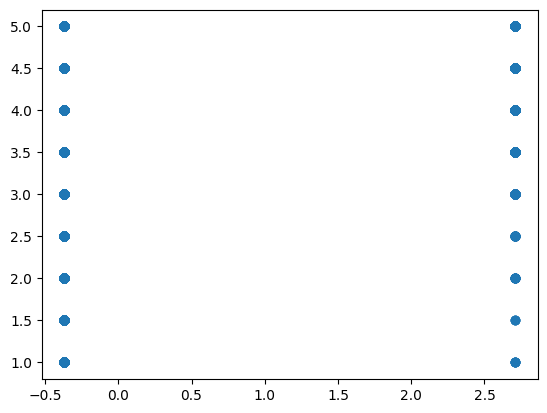

In [218]:
plt.scatter(train_scaled[:,6], y)

<a name="4"></a>
# Model Training and evaluation

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [220]:
#  spliting data into 60% training, 20% cross validation 20% test data
x_train , x_, y_train, y_ = train_test_split(train_scaled,y, test_size=0.4, random_state =88)

x_cv, x_test, y_cv, y_test = train_test_split(x_,y_, test_size=0.5,  random_state =88)


In [221]:
print(f"shape of X_train: {x_train.shape}")
print(f"shape of y_train: {y_train.shape}\n")
print(f"shape of X_cv: {x_cv.shape}")
print(f"shape of y_cv: {y_cv.shape}\n")
print(f"shape of X_test: {x_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_train: (22496, 19)
shape of y_train: (22496,)

shape of X_cv: (7499, 19)
shape of y_cv: (7499,)

shape of X_test: (7499, 19)
shape of y_test: (7499,)


In [222]:
linear_model = LinearRegression()

linear_model.fit(x_train,y_train)
yhat_train = linear_model.predict(x_train)
mse_train = mean_squared_error(y_train,yhat_train)

In [223]:
# on train data
yhat_train = linear_model.predict(x_train)
mse_train = mean_squared_error(y_train,yhat_train)
# on ccross validation data
yhat_cv = linear_model.predict(x_cv)
mse_cv = mean_squared_error(y_cv,yhat_cv)
# on test data
yhat_test = linear_model.predict(x_test)
mse_test = mean_squared_error(y_test,yhat_test)

print(f"Mean squared error on train data: {mse_train}")
print(f"Mean squared error on cross-validation data: {mse_cv}")
print(f"Mean squared error on test data: {mse_test}")



Mean squared error on train data: 0.15187500568013548
Mean squared error on cross-validation data: 0.15936957282693964
Mean squared error on test data: 0.16144909372473915


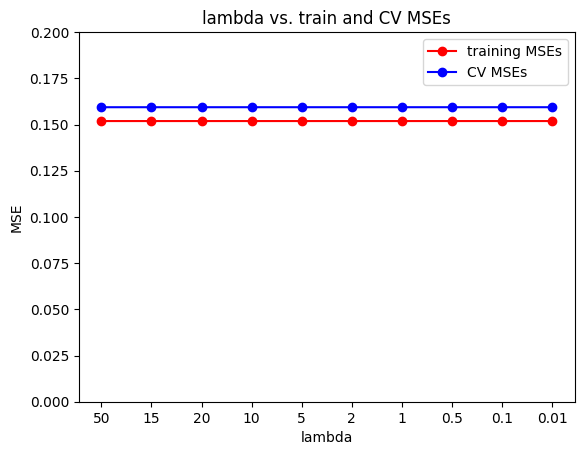

In [234]:
from sklearn.linear_model import Ridge

# Define lambdas to plot
reg_params = [50,15,20,10, 5, 2, 1, 0.5, 0.1,0.01]

def train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv):

    train_mses = []
    cv_mses = []
    models = []
    for reg_param in reg_params:

        # Create and train the model
        model = Ridge(alpha=reg_param)
        model.fit(x_train, y_train)
        models.append(model)

        yhat = model.predict(x_train)
        train_mse = mean_squared_error(y_train, yhat)
        train_mses.append(train_mse)

        # Compute the cross-validation MSE
        yhat = model.predict(x_cv)
        cv_mse = mean_squared_error(y_cv, yhat)
        cv_mses.append(cv_mse)


    # Plot the results
    reg_params = [str(x) for x in reg_params]
    plt.plot(reg_params, train_mses, marker='o', c='r', label='training MSEs');
    plt.plot(reg_params, cv_mses, marker='o', c='b', label='CV MSEs');
    plt.title("lambda vs. train and CV MSEs")
    plt.xlabel("lambda");
    plt.ylabel("MSE");
    plt.legend()
    plt.ylim([0,0.2])
    plt.show()

train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv)

## decision tree regressor

In [225]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train, y_train)

dt_regressor.get_depth()

41

In [226]:
print(f"Mean squared error on train data  (DecisionTree): {mean_squared_error(y_train,dt_regressor.predict(x_train))}")
print(f"Mean squared error on cross-val data (DecisionTree): {mean_squared_error(y_cv,dt_regressor.predict(x_cv))}")

Mean squared error on train data  (DecisionTree): 0.0037627059625414887
Mean squared error on cross-val data (DecisionTree): 0.31439747521891803


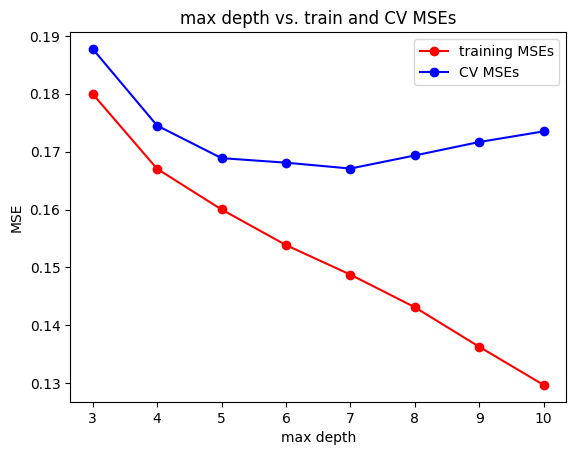

In [227]:
max_depths =[3,4,5,6,7,8,9,10]
def train_plot_max_depth(max_depths, x_train, y_train, x_cv, y_cv):
    train_mses = []
    cv_mses = []
    models = []
    for depth in max_depths:

        # Create and train the model
        model = DecisionTreeRegressor(max_depth= depth, random_state=42)
        model.fit(x_train, y_train)
        models.append(model)

        yhat = model.predict(x_train)
        train_mse = mean_squared_error(y_train, yhat)
        train_mses.append(train_mse)

        # Compute the cross-validation MSE
        yhat = model.predict(x_cv)
        cv_mse = mean_squared_error(y_cv, yhat)
        cv_mses.append(cv_mse)


    # Plot the results
    max_depth = [str(x) for x in max_depths]
    plt.plot(max_depths, train_mses, marker='o', c='r', label='training MSEs');
    plt.plot(max_depths, cv_mses, marker='o', c='b', label='CV MSEs');
    plt.title("max depth vs. train and CV MSEs")
    plt.xlabel("max depth");
    plt.ylabel("MSE");
    plt.legend()
    # plt.ylim([0,0.2])
    plt.show()
train_plot_max_depth(max_depths, x_train, y_train, x_cv, y_cv)

In [228]:
best_dt_regressor = DecisionTreeRegressor(max_depth=5,random_state=42)
best_dt_regressor.fit(x_train, y_train)

# on train data
yhat_train_dt = dt_regressor.predict(x_train)
mse_train_dt = mean_squared_error(y_train,yhat_train_dt)
# on ccross validation data
yhat_cv_dt = dt_regressor.predict(x_cv)
mse_cv_dt = mean_squared_error(y_cv,yhat_cv_dt)
# on test data
yhat_test_dt = dt_regressor.predict(x_test)
mse_test_dt = mean_squared_error(y_test,yhat_test_dt)

print(f"Mean squared error on train data  (DecisionTree): {mse_train_dt}\t\t (LinearModel): {mse_train}")
print(f"Mean squared error on cross-val data (DecisionTree): {mse_cv_dt}\t (LinearModel): {mse_cv}")
print(f"Mean squared error on test data  (DecisionTree): {mse_test_dt}\t\t (LinearModel): {mse_test}")

Mean squared error on train data  (DecisionTree): 0.0037627059625414887		 (LinearModel): 0.15187500568013548
Mean squared error on cross-val data (DecisionTree): 0.31439747521891803	 (LinearModel): 0.15936957282693964
Mean squared error on test data  (DecisionTree): 0.3128984327539968		 (LinearModel): 0.16144909372473915


In [229]:
mae_train_dt = mean_absolute_error(y_train,yhat_train_dt)
mae_cv_dt = mean_absolute_error(y_cv,yhat_cv_dt)
mae_test_dt = mean_absolute_error(y_test,yhat_test_dt)

mae_train = mean_absolute_error(y_train,yhat_train)
mae_cv = mean_absolute_error(y_cv,yhat_cv)
mae_test = mean_absolute_error(y_test,yhat_test)

print(f"Mean absolute error on train data  (DecisionTree): {mae_train_dt}\t\t (LinearModel): {mae_train}")
print(f"Mean absolute error on cross-val data (DecisionTree): {mae_cv_dt}\t (LinearModel): {mae_cv}")
print(f"Mean absolute error on test data  (DecisionTree): {mae_test_dt}\t\t (LinearModel): {mae_test}")

Mean absolute error on train data  (DecisionTree): 0.0110575213371266		 (LinearModel): 0.2987948065284851
Mean absolute error on cross-val data (DecisionTree): 0.3977641463306219	 (LinearModel): 0.30545618694114346
Mean absolute error on test data  (DecisionTree): 0.3911132595457172		 (LinearModel): 0.30342770812516523


In [230]:
print(f"Root-Mean squared error on train data  (DecisionTree): {np.sqrt(mse_train_dt)}\t\t (LinearModel): {np.sqrt(mse_train)}")
print(f"Root-Mean squared error on cross-val data (DecisionTree): {np.sqrt(mse_cv_dt)}\t (LinearModel): {np.sqrt(mse_cv)}")
print(f"Root-Mean squared error on test data  (DecisionTree): {np.sqrt(mse_test_dt)}\t\t (LinearModel): {np.sqrt(mse_test)}")

Root-Mean squared error on train data  (DecisionTree): 0.0613408995902529		 (LinearModel): 0.38971143899061456
Root-Mean squared error on cross-val data (DecisionTree): 0.5607115793515576	 (LinearModel): 0.3992111882537107
Root-Mean squared error on test data  (DecisionTree): 0.5593732499449691		 (LinearModel): 0.4018072843102016


Conclusion:  Linear Model works better than Decision tree Regressor model


In [231]:
Final_model = linear_model

In [240]:
predicted_review = Final_model.predict(x_test[60:70,:])
ground_truth_review = y_test[60:70]

In [243]:
print(f"ground_truth_review: {list(ground_truth_review)}")
print(f"predicted_review: {predicted_review}")


ground_truth_review: [4.0, 2.0, 5.0, 3.5, 2.0, 4.5, 3.0, 3.5, 5.0, 4.0]
predicted_review: [3.92488252 1.60664522 4.85691988 3.50410616 2.81260835 4.24122774
 2.74311983 3.66713106 3.9998337  4.16917574]
